In [11]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_logistica_ensamble as sle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
data_pickle = pd.read_pickle("datos/data_final_encoded.pkl")
df = pd.DataFrame(data_pickle)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,Over18_Y
0,51,0,0.149569,0.150224,6,2,0.166667,1,0.145038,0.124814,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1.0,0.0,1.0
1,31,1,0.249097,0.157128,10,1,0.166667,1,0.181507,0.255319,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,1.0,0.0,1.0
2,32,0,0.249097,0.157128,17,4,0.121951,4,0.168712,0.124814,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,0.0,1.0,1.0
3,38,0,0.080000,0.157128,2,5,0.166667,3,0.134615,0.124814,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,0.0,1.0,1.0
4,32,0,0.149569,0.157128,10,1,0.161638,1,0.168712,0.255319,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,0.0,1.0,1.0


------------------ Uilizando LOGISTIC_REGRESSION ------------------
----------------------------------------------------------------


c:\Users\ivigo\anaconda3\envs\proyecto8\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


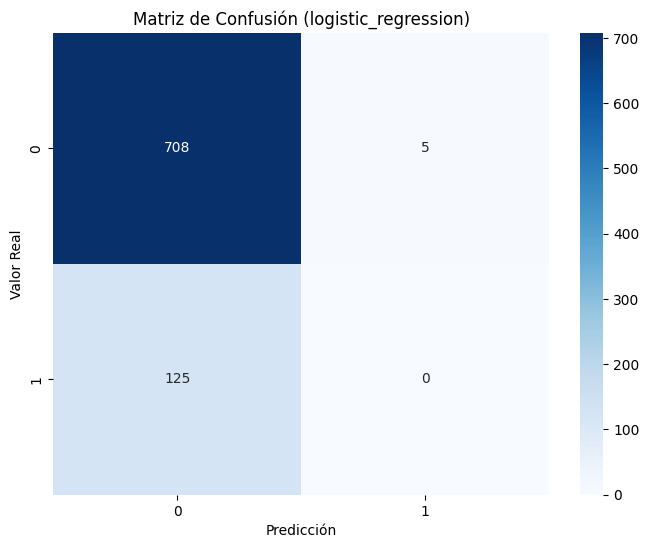

c:\Bravo\Hackio\Modulo8\proyecto\proyecto8-PrediccionEmpleados\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


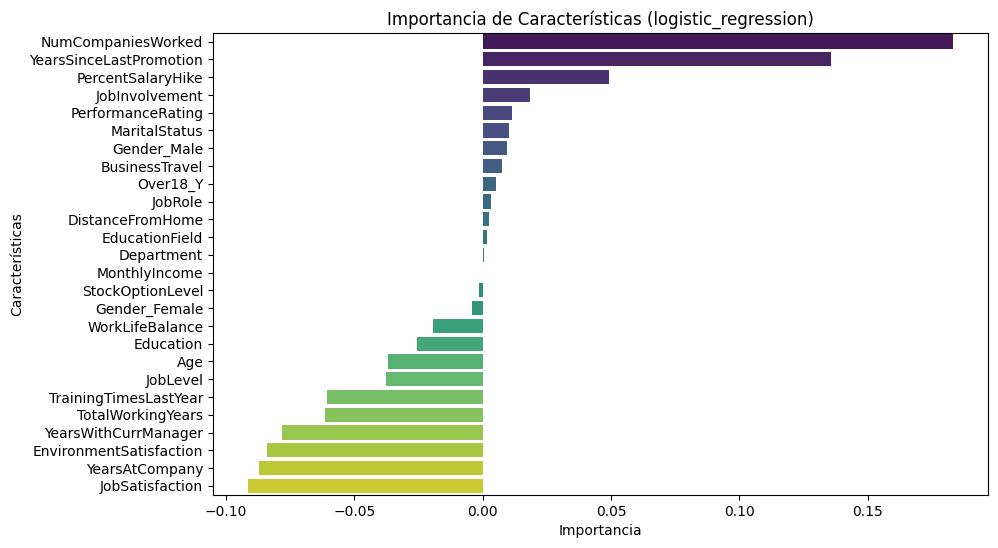

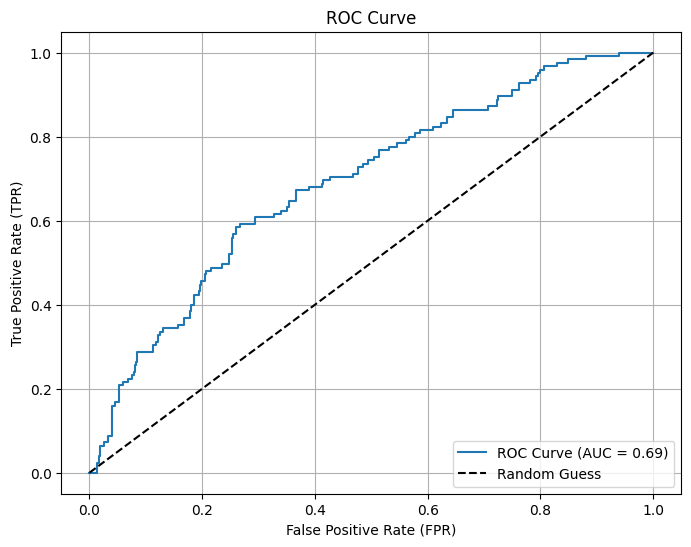

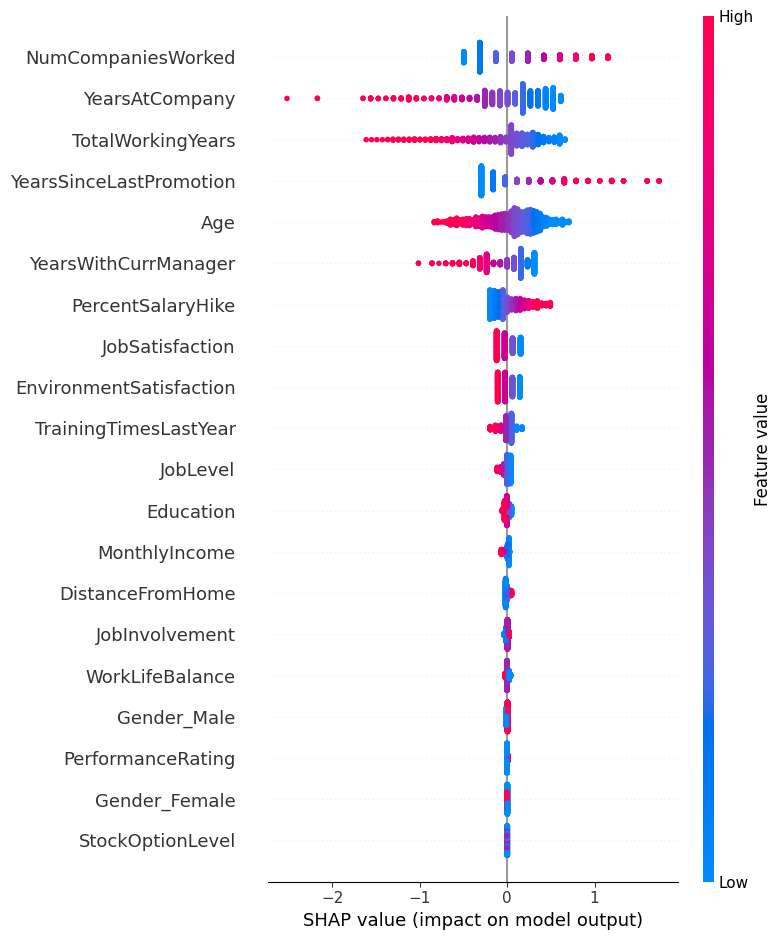

,train,test
accuracy,0.851388,0.844869
precision,0.787058,0.723159
recall,0.851388,0.844869
f1,0.791438,0.77929
kappa,0.02908,-0.011607
auc,0.750145,0.690491
tiempo_computacion(segundos),0.001,0.001
nucleos_usados,None,None
modelo,logistic_regression,logistic_regression


------------------ Uilizando TREE ------------------
----------------------------------------------------------------
El mejor modelo es DecisionTreeClassifier(max_depth=10)


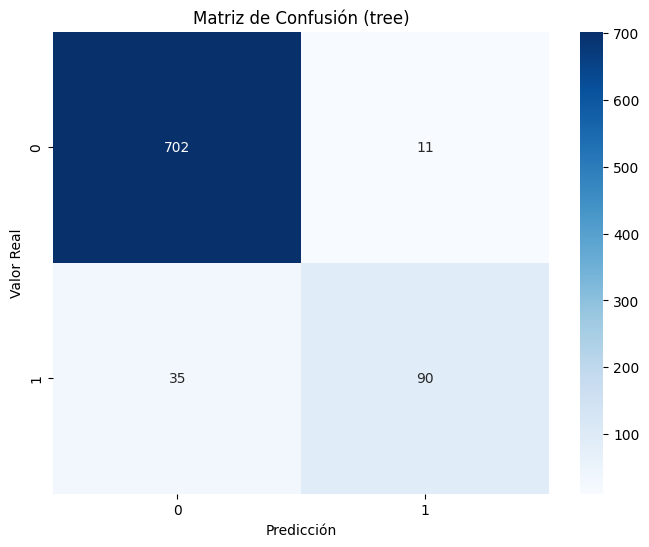

c:\Bravo\Hackio\Modulo8\proyecto\proyecto8-PrediccionEmpleados\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


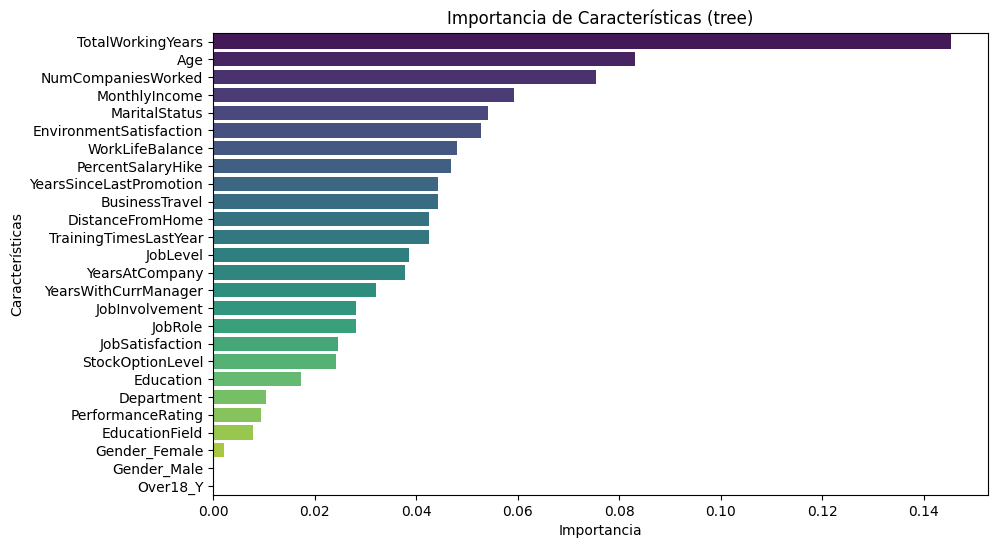

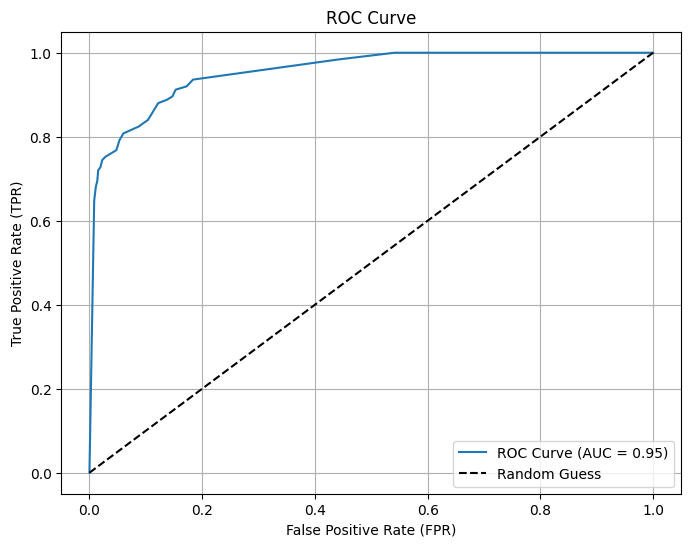

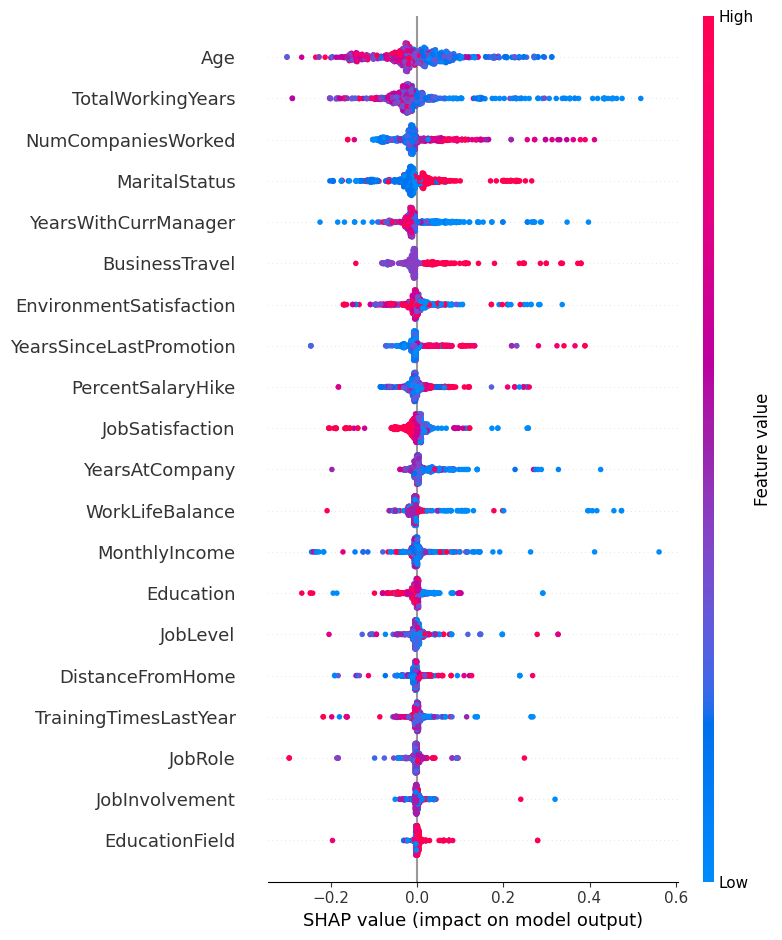

,train,test,train,test
accuracy,0.851388,0.844869,0.977619,0.945107
precision,0.787058,0.723159,0.977915,0.943348
recall,0.851388,0.844869,0.977619,0.945107
f1,0.791438,0.77929,0.976929,0.942647
kappa,0.02908,-0.011607,0.905153,0.765149
auc,0.750145,0.690491,0.986108,0.954171
tiempo_computacion(segundos),0.001,0.001,0.001225,0.001225
nucleos_usados,None,None,16,16
modelo,logistic_regression,logistic_regression,tree,tree


------------------ Uilizando RANDOM_FOREST ------------------
----------------------------------------------------------------
El mejor modelo es RandomForestClassifier(max_depth=20)


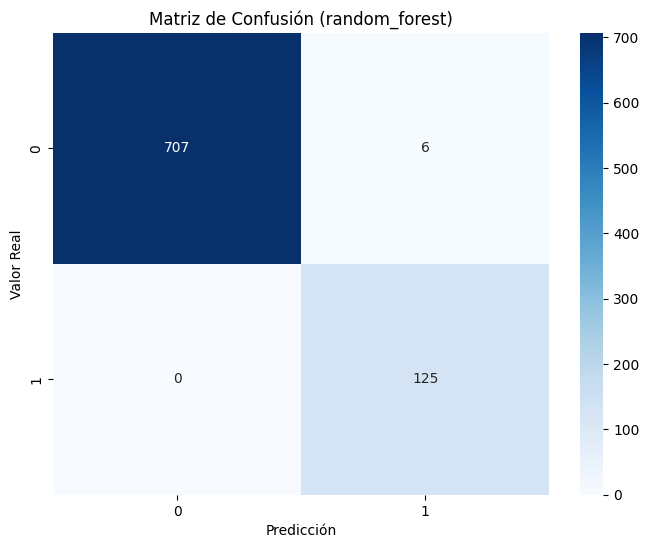

c:\Bravo\Hackio\Modulo8\proyecto\proyecto8-PrediccionEmpleados\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


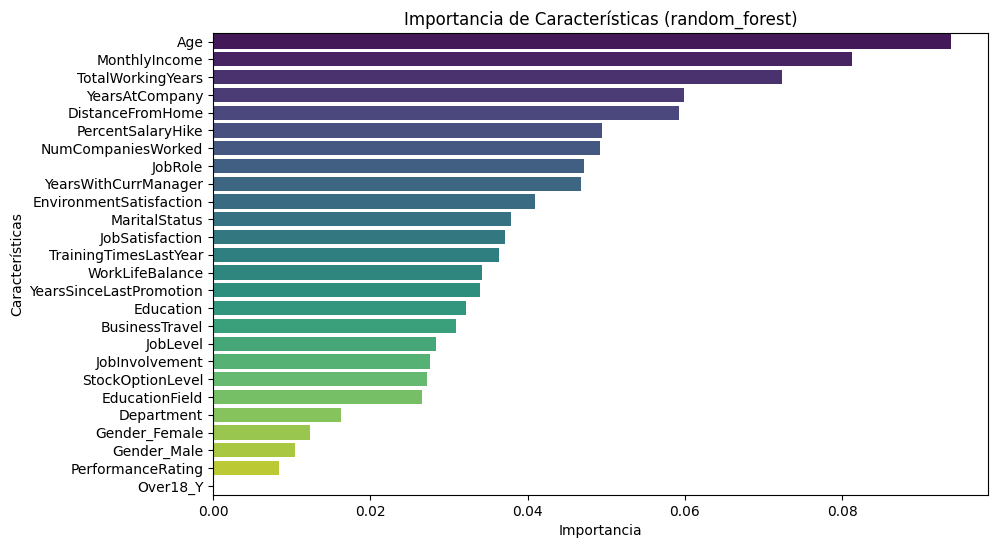

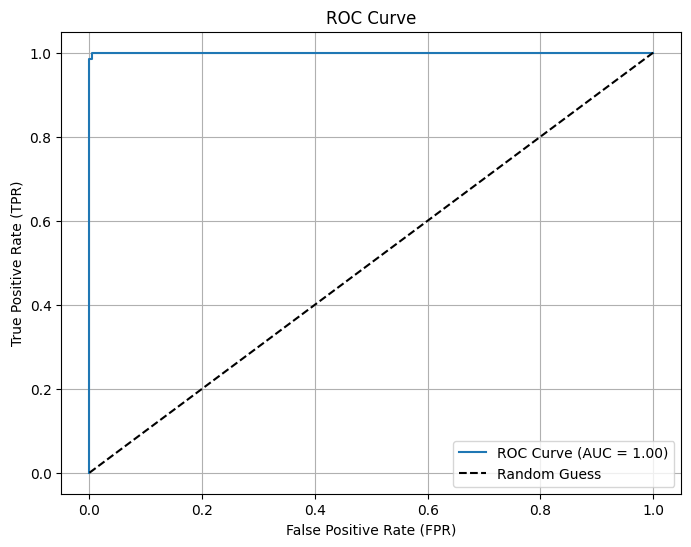

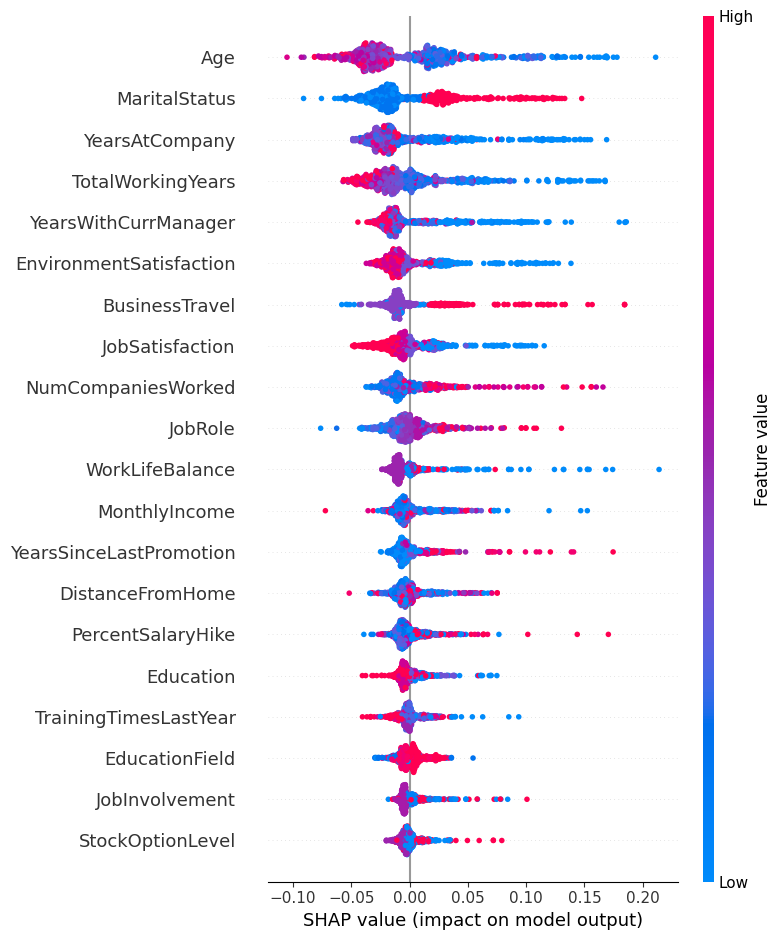

,train,test,train,test,train,test
accuracy,0.851388,0.844869,0.977619,0.945107,1.0,0.99284
precision,0.787058,0.723159,0.977915,0.943348,1.0,0.993168
recall,0.851388,0.844869,0.977619,0.945107,1.0,0.99284
f1,0.791438,0.77929,0.976929,0.942647,1.0,0.992909
kappa,0.02908,-0.011607,0.905153,0.765149,1.0,0.97234
auc,0.750145,0.690491,0.986108,0.954171,1.0,0.999933
tiempo_computacion(segundos),0.001,0.001,0.001225,0.001225,0.025002,0.025002
nucleos_usados,None,None,16,16,None,None
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest


------------------ Uilizando GRADIENT_BOOSTING ------------------
----------------------------------------------------------------
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, subsample=0.8)


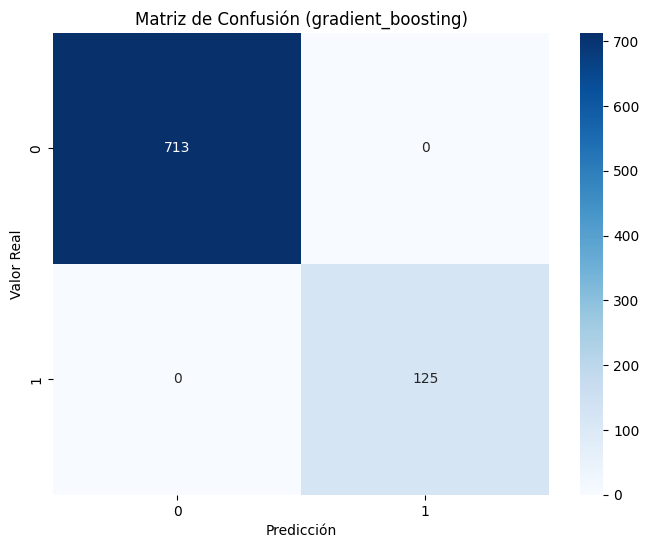

c:\Bravo\Hackio\Modulo8\proyecto\proyecto8-PrediccionEmpleados\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


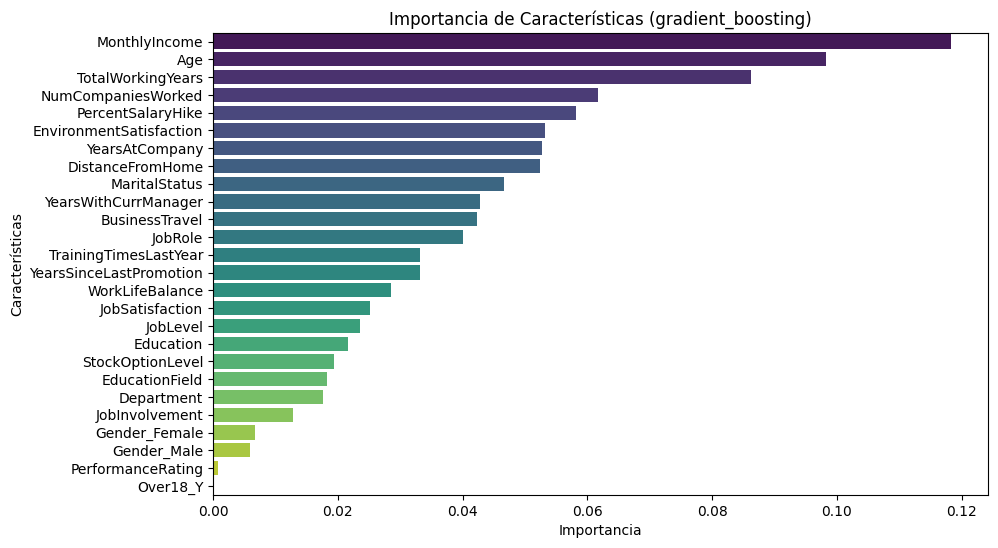

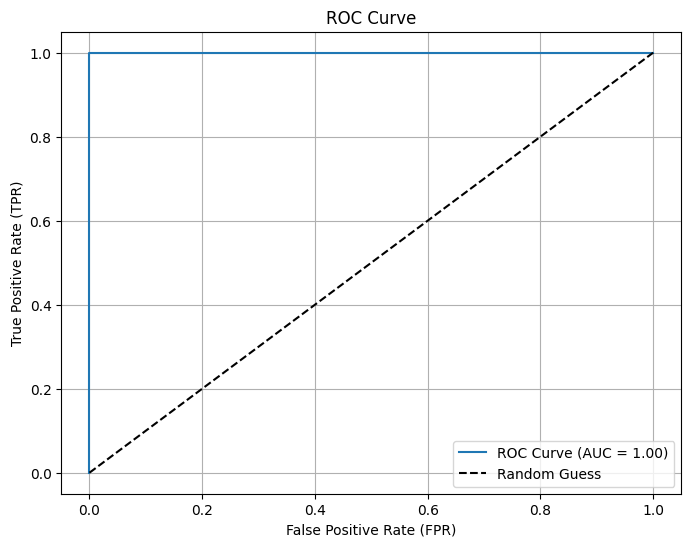

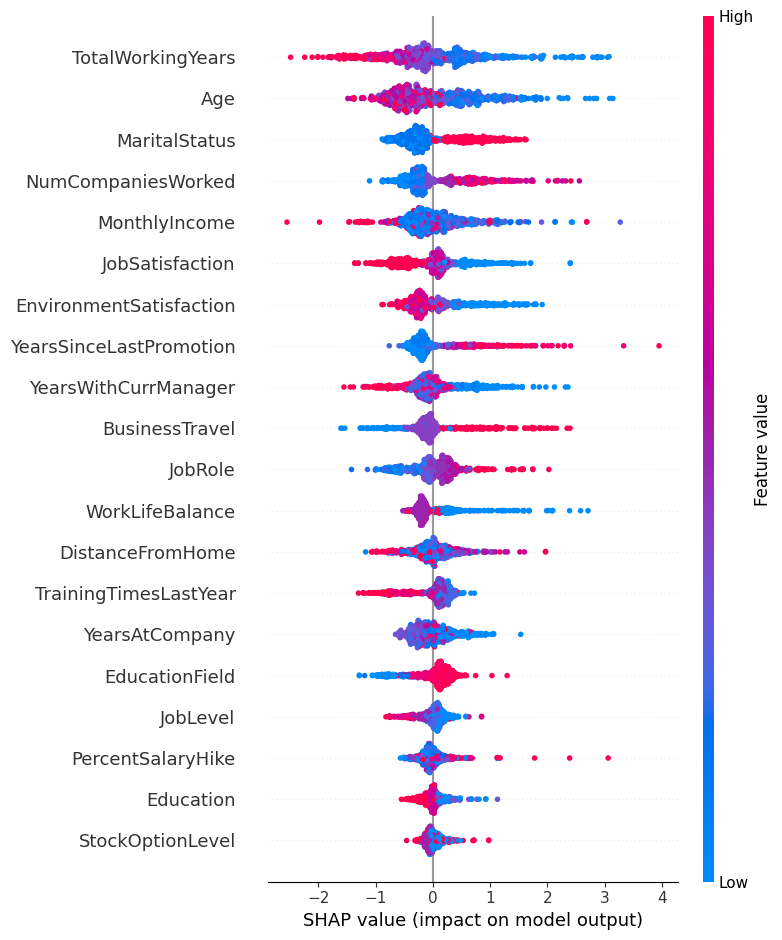

,train,test,train,test,train,test,train,test
accuracy,0.851388,0.844869,0.977619,0.945107,1.0,0.99284,1.0,1.0
precision,0.787058,0.723159,0.977915,0.943348,1.0,0.993168,1.0,1.0
recall,0.851388,0.844869,0.977619,0.945107,1.0,0.99284,1.0,1.0
f1,0.791438,0.77929,0.976929,0.942647,1.0,0.992909,1.0,1.0
kappa,0.02908,-0.011607,0.905153,0.765149,1.0,0.97234,1.0,1.0
auc,0.750145,0.690491,0.986108,0.954171,1.0,0.999933,1.0,1.0
tiempo_computacion(segundos),0.001,0.001,0.001225,0.001225,0.025002,0.025002,0.009328,0.009328
nucleos_usados,None,None,16,16,None,None,16,16
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting


------------------ Uilizando XGBOOST ------------------
----------------------------------------------------------------
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


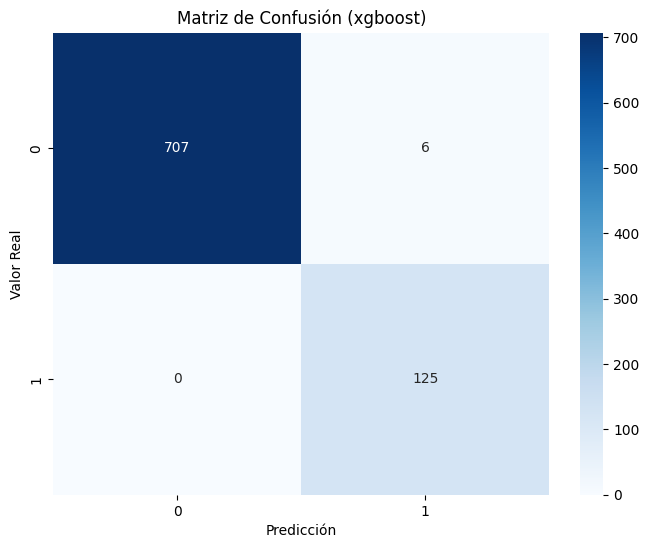

c:\Bravo\Hackio\Modulo8\proyecto\proyecto8-PrediccionEmpleados\modelos\modelo1\../..\src\soporte_logistica_ensamble.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


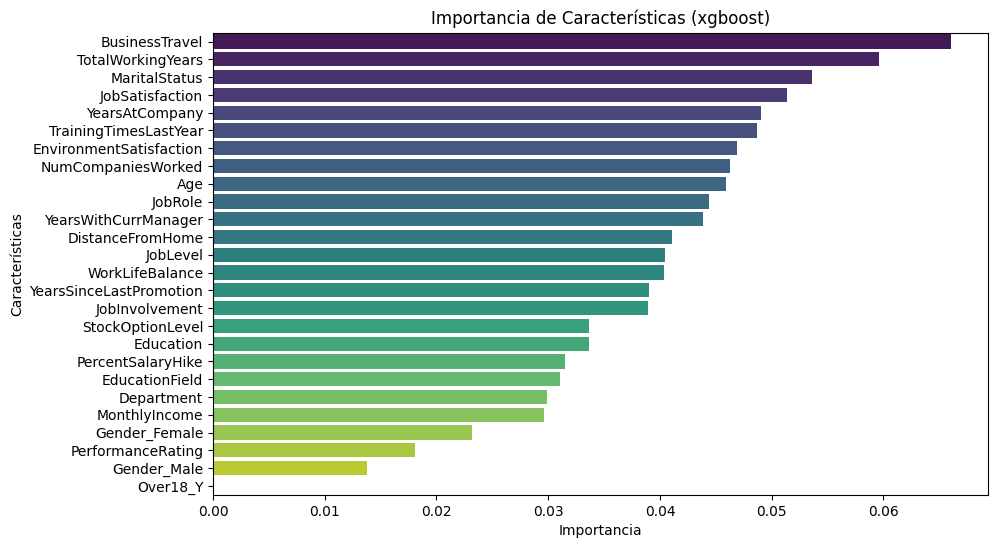

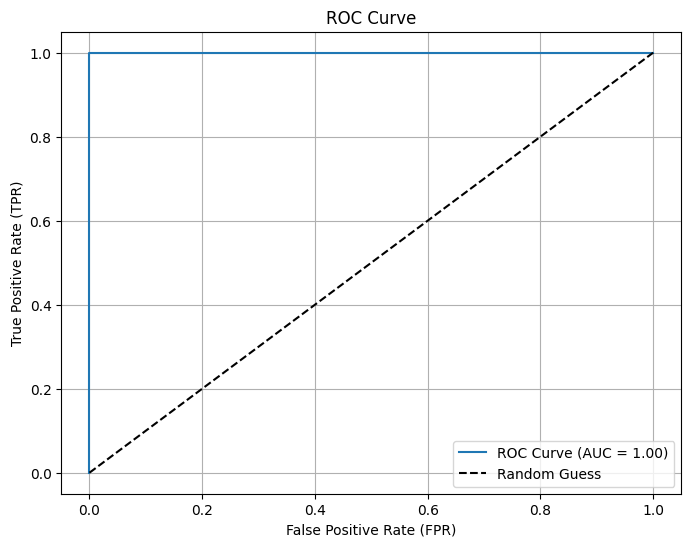

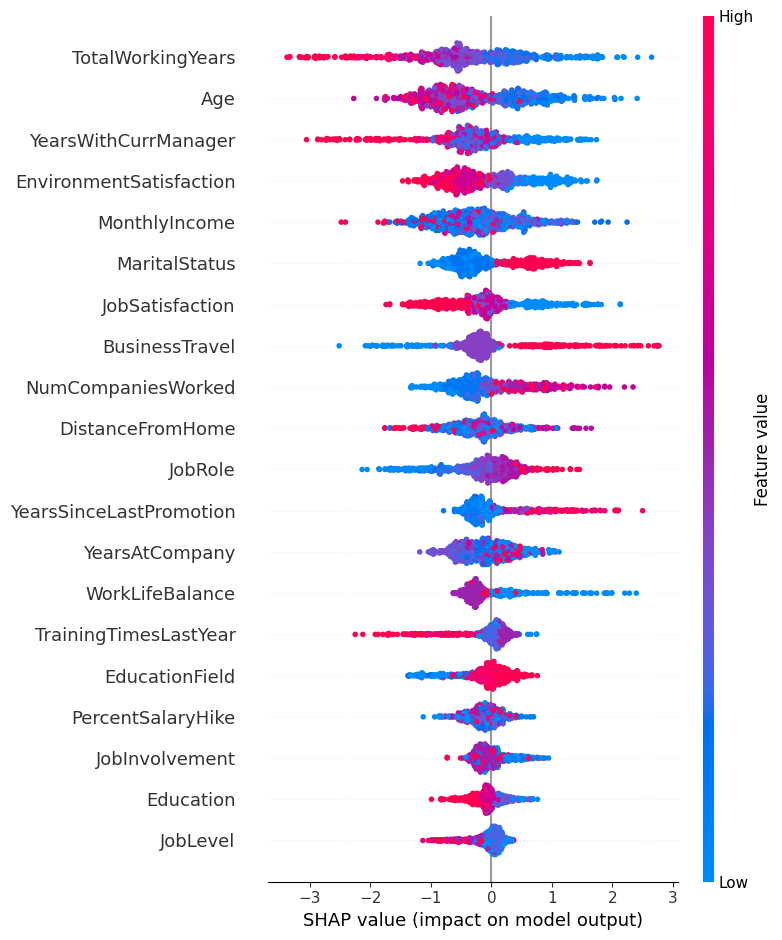

,train,test,train,test,train,test,train,test,train,test
accuracy,0.851388,0.844869,0.977619,0.945107,1.0,0.99284,1.0,1.0,1.0,0.99284
precision,0.787058,0.723159,0.977915,0.943348,1.0,0.993168,1.0,1.0,1.0,0.993168
recall,0.851388,0.844869,0.977619,0.945107,1.0,0.99284,1.0,1.0,1.0,0.99284
f1,0.791438,0.77929,0.976929,0.942647,1.0,0.992909,1.0,1.0,1.0,0.992909
kappa,0.02908,-0.011607,0.905153,0.765149,1.0,0.97234,1.0,1.0,1.0,0.97234
auc,0.750145,0.690491,0.986108,0.954171,1.0,0.999933,1.0,1.0,1.0,1.0
tiempo_computacion(segundos),0.001,0.001,0.001225,0.001225,0.025002,0.025002,0.009328,0.009328,0.016196,0.016196
nucleos_usados,None,None,16,16,None,None,16,16,None,None
modelo,logistic_regression,logistic_regression,tree,tree,random_forest,random_forest,gradient_boosting,gradient_boosting,xgboost,xgboost


,accuracy,precision,recall,f1,kappa
train,0.851388,0.787058,0.851388,0.791438,0.02908
test,0.844869,0.723159,0.844869,0.77929,-0.011607
train,0.977619,0.977915,0.977619,0.976929,0.905153
test,0.945107,0.943348,0.945107,0.942647,0.765149
train,1.0,1.0,1.0,1.0,1.0
test,0.99284,0.993168,0.99284,0.992909,0.97234
train,1.0,1.0,1.0,1.0,1.0
test,1.0,1.0,1.0,1.0,1.0
train,1.0,1.0,1.0,1.0,1.0
test,0.99284,0.993168,0.99284,0.992909,0.97234


In [13]:
lista_modelos = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_metricas = pd.DataFrame()
soporte = sle.AnalisisModelosClasificacion(df, "Attrition")
for modelo in lista_modelos:
    print(f"------------------ Uilizando {modelo.upper()} ------------------")
    print("----------------------------------------------------------------")
    soporte.ajustar_modelo(modelo)
    df_temp = soporte.calcular_metricas(modelo)
    df_metricas = pd.concat([df_metricas, df_temp], axis=1)
    soporte.plot_matriz_confusion(modelo)
    soporte.importancia_predictores(modelo)
    soporte.hacer_roc_curve(modelo)
    soporte.plot_shap_summary(modelo)
    display(df_metricas)
df_metricas.head().T

In [14]:
df_resultados_colores = df_metricas.T.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(sle.color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.851388,0.787058,0.851388,0.791438,0.029080,0.750145,0.001000,None,logistic_regression
1,0.844869,0.723159,0.844869,0.779290,-0.011607,0.690491,0.001000,None,logistic_regression
2,0.977619,0.977915,0.977619,0.976929,0.905153,0.986108,0.001225,16,tree
3,0.945107,0.943348,0.945107,0.942647,0.765149,0.954171,0.001225,16,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.025002,None,random_forest
5,0.992840,0.993168,0.992840,0.992909,0.972340,0.999933,0.025002,None,random_forest
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.009328,16,gradient_boosting
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.009328,16,gradient_boosting
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.016196,None,xgboost
9,0.992840,0.993168,0.992840,0.992909,0.972340,1.000000,0.016196,None,xgboost


# Conclusiones

- Modelos de Ensamble Sobresalen: Random Forest tiene una precisión (accuracy) de 99.3% en el conjunto de entrenamiento y de prueba. Todas las métricas (precision, recall, f1, kappa, auc) son consistentemente altas, alcanzando valores de 0.99 o 1.0, lo que indica un excelente equilibrio entre el ajuste y la generalización.

- Potencial Overfitting: Gradient Boosting y XGBoost presentan métricas perfectas en el conjunto de entrenamiento y de prueba (accuracy, precision, recall, f1, kappa, auc de 1.0). Esto podría indicar sobreajuste y requiere validación adicional para confirmar su capacidad de generalización.

- Regresión Logística: La regresión logística muestra un rendimiento decente con una precisión de 85% en el conjunto de entrenamiento y de 84% en el conjunto de prueba. La kappa es de 0.02 y -0.01, respectivamente, y el auc es de 0.75 en entrenamiento y 0.69 en prueba, lo que indica una discriminación moderada.

- Árbol de Decisión: El árbol de decisión alcanza un accuracy de 97.7% en el conjunto de entrenamiento y 94.5% en el conjunto de prueba. El valor de kappa disminuye de 0.91 en entrenamiento a 0.76 en prueba, lo cual sugiere un posible sobreajuste.